# import libraries

In [32]:
import requests
from bs4 import BeautifulSoup
import csv
from itertools import zip_longest

job_title = []
links = []
company_name = []
skills = []
location_name = []
salary = []
responsibilities = []
date = []

# use requests to fetch URL

In [33]:
result = requests.get('https://wuzzuf.net/search/jobs/?a=hpb%7Cspbg&q=python')


# save content

In [34]:
src = result.content
#print(src)

# create soup object to parse content

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, shrink-to-fit=no" name="viewport"/>
<title data-react-helmet="true">Job Search | WUZZUF</title>
<meta charset="utf-8" data-react-helmet="true"/><meta content="Searching for jobs in Egypt? Wuzzuf helps you in your online job search to find Jobs in Egypt and Middle East. Choose the right job using our online recruitment services." data-react-helmet="true" name="description"/><meta content="jobs in Egypt, job in Egypt, careers egypt, jobs in Cairo, jobs in alexandria, employment in egypt, Egypt jobs, jobs vacancies, job vacancies in egypt, job search egypt, job vacancies egypt, job recruitment in egypt, job opportunities in egypt, jobs cairo, job vacancy egypt , وظائف مصر" data-react-helmet="true" name="keywords"/><meta content="Jobs in Egypt | WUZZUF" data-react-helmet="true" property="og:title"/><meta content="websit
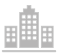

In [35]:
soup = BeautifulSoup(src, "lxml")
print(soup)

# find elements containing information we needs

In [36]:
job_titles = soup.find_all('h2', {'class':'css-m604qf'})
print(job_titles)

[<h2 class="css-m604qf"><style data-emotion="css o171kl">.css-o171kl{-webkit-text-decoration:none;text-decoration:none;color:inherit;}</style><a class="css-o171kl" href="https://wuzzuf.net/jobs/p/vSgUo8dOv6bY-Senior-Python-Developer-ExaServe-LLC-Cairo-Egypt?o=1&amp;l=sp&amp;t=sj&amp;a=python|search-v3|hpb|spbg" rel="noreferrer" target="_blank">Senior Python Developer</a></h2>, <h2 class="css-m604qf"><a class="css-o171kl" href="https://wuzzuf.net/jobs/p/TcKtJ0ZFHMYY-Python-GCP-AppEngine-Engineer-camelCase-Giza-Egypt?o=2&amp;l=sp&amp;t=sj&amp;a=python|search-v3|hpb|spbg" rel="noreferrer" target="_blank">Python (GCP AppEngine) Engineer</a></h2>, <h2 class="css-m604qf"><a class="css-o171kl" href="https://wuzzuf.net/jobs/p/D4VPAQTuFGuE-Software-Engineer---Backend-Development-Python-Django-Synapse-Analytics-Cairo-Egypt?o=3&amp;l=sp&amp;t=sj&amp;a=python|search-v3|hpb|spbg" rel="noreferrer" target="_blank">Software Engineer - Backend Development (Python Django)</a></h2>, <h2 class="css-m604qf

In [37]:
job_titles = soup.find_all('h2', {'class':'css-m604qf'})
company_names = soup.find_all("a", {"class":"css-17s97q8"})
locations_names = soup.find_all("span", {"class":"css-5wys0k"})
job_skills = soup.find_all("div", {"class":"css-y4udm8"})
posted_new = soup.find_all("div", {"class":"css-4c4ojb"})
posted_old = soup.find_all("div", {"class":"css-do6t5g"})
posted = [*posted_new, *posted_old]

# loop over returned list  extract info into other list

In [38]:
for i in range(len(job_titles)):
    job_title.append(job_titles[i].text)
    links.append(job_titles[i].find("a").attrs["href"])
    company_name.append(company_names[i].text)
    skills.append(job_skills[i].text)
    location_name.append(locations_names[i].text)

    for link in links:
        result = requests.get(link)
        src = result.content
        soup = BeautifulSoup(src,"lxml")
        salaries = soup.find("span", {"class":"css-4xky9y"})
        requirements = soup.find("div", {"class":"css-1t5f0fr"}).ul
        respon_text =""
    for li in requirements.find_all("li"):
        respon_text += li.text+"| "
        responsibilities.append(respon_text)    
    
    #salary.append(salaries.text.strip())   

# create a csv file and fill it with data

In [40]:
file_list = [job_title, company_name, skills, location_name, links, requirements]
exported = zip_longest(*file_list)

with open("jobs.csv", "w",encoding ='utf-8') as file:
    wr = csv.writer(file)
    wr.writerow(["job_title", "company_name", "skills", "location_name", "links", "requirements"])
    wr.writerows(exported)